In [3]:
import sys
print(sys.version)


3.12.7 | packaged by conda-forge | (main, Oct  4 2024, 15:47:54) [MSC v.1941 64 bit (AMD64)]


In [4]:
import numpy as np

In [5]:
import pandas as pd

In [6]:
import seaborn as sns

In [7]:
import sklearn as sk

In [8]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
import re,string,unicodedata

In [9]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split

In [10]:
import nltk
from nltk.corpus import stopwords

In [11]:
from string import punctuation

In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import math
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, TensorDataset

In [13]:
x_train = pd.read_csv("x_train.csv")
y_train = pd.read_csv("y_train.csv")
x_test = pd.read_csv("x_test.csv")
y_test = pd.read_csv("y_test.csv")
x_train = x_train.to_numpy(dtype=np.float16)
y_train = y_train.to_numpy(dtype=np.float16)
x_test = x_test.to_numpy(dtype=np.float16)
y_test = y_test.to_numpy(dtype=np.float16)

In [14]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import torch.optim as optim

In [15]:
y_train = torch.tensor(y_train, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

x_train = torch.tensor(x_train, dtype=torch.float32)
x_test = torch.tensor(x_test, dtype=torch.float32)

In [16]:
layer_sizes = [1024, 512, 256, 16]

In [17]:
loaded_model1_params = torch.load("model1_params.pt")
loaded_point1params = torch.load("point1params.pt")

loaded_model2_params = torch.load("model2_params.pt")
loaded_point2params = torch.load("point2params.pt")

loaded_model3_params = torch.load("model3_params.pt")
loaded_point3params = torch.load("point3params.pt")

loaded_model4_params = torch.load("model4_params.pt")
loaded_point4params = torch.load("point4params.pt")

loaded_model5_params = torch.load("model5_params.pt")

C:\Users\afyil\AppData\Local\Temp\ipykernel_19116\3271532471.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model1_params = torch.load("model1_params.pt")
C:\Use

In [18]:
loaded_model3_params

tensor([ 0.0253, -0.0568,  0.0476,  ..., -0.0166,  0.1292, -0.0517],
       device='cuda:0')

In [19]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
x_test = x_test.to(device)
y_test = y_test.to(device)

In [20]:
def manual_model_forward(X, params, layer_sizes):
    W1 = params[:layer_sizes[0] * layer_sizes[1]].reshape(layer_sizes[1], layer_sizes[0])
    b1 = params[layer_sizes[0] * layer_sizes[1]:layer_sizes[0] * layer_sizes[1] + layer_sizes[1]]
    
    W2_start = layer_sizes[0] * layer_sizes[1] + layer_sizes[1]
    W2 = params[W2_start:W2_start + layer_sizes[1] * layer_sizes[2]].reshape(layer_sizes[2], layer_sizes[1])
    b2_start = W2_start + layer_sizes[1] * layer_sizes[2]
    b2 = params[b2_start:b2_start + layer_sizes[2]]
    
    W3_start = b2_start + layer_sizes[2]
    W3 = params[W3_start:W3_start + layer_sizes[2] * layer_sizes[3]].reshape(layer_sizes[3], layer_sizes[2])
    b3_start = W3_start + layer_sizes[2] * layer_sizes[3]
    b3 = params[b3_start:]


  
    x = torch.relu(X @ W1.T + b1)
    x = torch.relu(x @ W2.T + b2)
    x = torch.softmax(x @ W3.T + b3, dim=1)
    return x

In [21]:
outputs_m1 = manual_model_forward(x_test, loaded_model1_params, layer_sizes)
outputs_m2 = manual_model_forward(x_test, loaded_model2_params, layer_sizes)
outputs_m3 = manual_model_forward(x_test, loaded_model3_params, layer_sizes)
outputs_m4 = manual_model_forward(x_test, loaded_model4_params, layer_sizes)
outputs_m5 = manual_model_forward(x_test, loaded_model5_params, layer_sizes)
outputs_p1 = manual_model_forward(x_test, loaded_point1params, layer_sizes)
outputs_p2 = manual_model_forward(x_test, loaded_point2params, layer_sizes)
outputs_p3 = manual_model_forward(x_test, loaded_point3params, layer_sizes)
outputs_p4 = manual_model_forward(x_test, loaded_point4params, layer_sizes)


prd_classes_m1 = torch.argmax(outputs_m1, dim=1)
prd_classes_m2 = torch.argmax(outputs_m2, dim=1)
prd_classes_m3 = torch.argmax(outputs_m3, dim=1)
prd_classes_m4 = torch.argmax(outputs_m4, dim=1)
prd_classes_m5 = torch.argmax(outputs_m5, dim=1)
prd_classes_p1 = torch.argmax(outputs_p1, dim=1)
prd_classes_p2 = torch.argmax(outputs_p2, dim=1)
prd_classes_p3 = torch.argmax(outputs_p3, dim=1)
prd_classes_p4 = torch.argmax(outputs_p4, dim=1)

In [22]:
prd_classes_m1

tensor([14,  1,  7,  ...,  7,  0,  7], device='cuda:0')

In [23]:
true_classes = torch.argmax(y_test, dim=1)

In [24]:
true_classes

tensor([14,  1, 11,  ...,  7,  0,  9], device='cuda:0')

In [25]:
accuracy_m1 = (prd_classes_m1 == true_classes).sum().item() / true_classes.size(0)
accuracy_m2 = (prd_classes_m2 == true_classes).sum().item() / true_classes.size(0)
accuracy_m3 = (prd_classes_m3 == true_classes).sum().item() / true_classes.size(0)
accuracy_m4 = (prd_classes_m4 == true_classes).sum().item() / true_classes.size(0)
accuracy_m5 = (prd_classes_m5 == true_classes).sum().item() / true_classes.size(0)
accuracy_p1 = (prd_classes_p1 == true_classes).sum().item() / true_classes.size(0)
accuracy_p2 = (prd_classes_p2 == true_classes).sum().item() / true_classes.size(0)
accuracy_p3 = (prd_classes_p3 == true_classes).sum().item() / true_classes.size(0)
accuracy_p4 = (prd_classes_p4 == true_classes).sum().item() / true_classes.size(0)

In [26]:
print(accuracy_m1)
print(accuracy_m2)
print(accuracy_m3)
print(accuracy_m4)
print(accuracy_m5)
print(accuracy_p1)
print(accuracy_p2)
print(accuracy_p3)
print(accuracy_p4)


0.5471951894928396
0.5418150170108395
0.5441095023340454
0.5393622913205158
0.5392040509533982
0.5289975472743097
0.5420523775615159
0.5321623546166627
0.5352480417754569


### models ensemble

In [28]:

all_predictions = [prd_classes_m1, prd_classes_m2, prd_classes_m3, prd_classes_m4, prd_classes_m5]

# Tensorlar CPU'ya ve numpy formatına
all_predictions = [pred.cpu().numpy() for pred in all_predictions]

df = pd.DataFrame({f'm{i+1}': all_predictions[i] for i in range(len(all_predictions))})



In [29]:
from scipy.stats import mode
# Ensemble sonuçları (majority voting)
ensemble_result = mode(df.values, axis=1).mode.flatten()

df['ensemble'] = ensemble_result

print(df)

       m1  m2  m3  m4  m5  ensemble
0      14  14  14  14  14        14
1       1   1   1   1   1         1
2       7   7   7   7   7         7
3       0   0  11  11   0         0
4       6   6   6   6   6         6
...    ..  ..  ..  ..  ..       ...
12634  15  15   4   4   4         4
12635   4   4   7  11  11         4
12636   7   7   7   7   7         7
12637   0   0   0   0   7         0
12638   7   7   7   9   7         7

[12639 rows x 6 columns]


In [30]:
ensemble_result = df['ensemble']
ensemble_result = torch.FloatTensor(ensemble_result).to(device)

In [31]:
accuracy_m_ens = (ensemble_result == true_classes).sum().item() / true_classes.size(0)

In [32]:
accuracy_m_ens

0.574254292269958

### .

### points ensemble

In [35]:

all_predictions_points = [prd_classes_m1, prd_classes_p1, prd_classes_p2, prd_classes_p3, prd_classes_p4, prd_classes_m5]

# Tensorlar CPU'ya ve numpy formatına
all_predictions_points = [pred.cpu().numpy() for pred in all_predictions_points]

df_points = pd.DataFrame({f'm{i+1}': all_predictions_points[i] for i in range(len(all_predictions_points))})



In [36]:
from scipy.stats import mode
# Ensemble sonuçları (majority voting)
ensemble_result_points = mode(df_points.values, axis=1).mode.flatten()

df_points['ensemble'] = ensemble_result_points

print(df_points)

       m1  m2  m3  m4  m5  m6  ensemble
0      14   4  14  14  14  14        14
1       1   1   1   1   1   1         1
2       7   7   7   7   7   7         7
3       0   0   0   0  11   0         0
4       6   6   6   6   6   6         6
...    ..  ..  ..  ..  ..  ..       ...
12634  15   4   4   4   4   4         4
12635   4   4   4   7   4  11         4
12636   7  12   6  12   7   7         7
12637   0   0   0   0   7   7         0
12638   7   7   7   7   7   7         7

[12639 rows x 7 columns]


In [37]:
ensemble_result_points = df_points['ensemble']
ensemble_result_points = torch.FloatTensor(ensemble_result_points).to(device)

In [38]:
accuracy_p_ens = (ensemble_result_points == true_classes).sum().item() / true_classes.size(0)

In [39]:
accuracy_p_ens

0.5618324234512224

### models-points-ensemble acc comparising

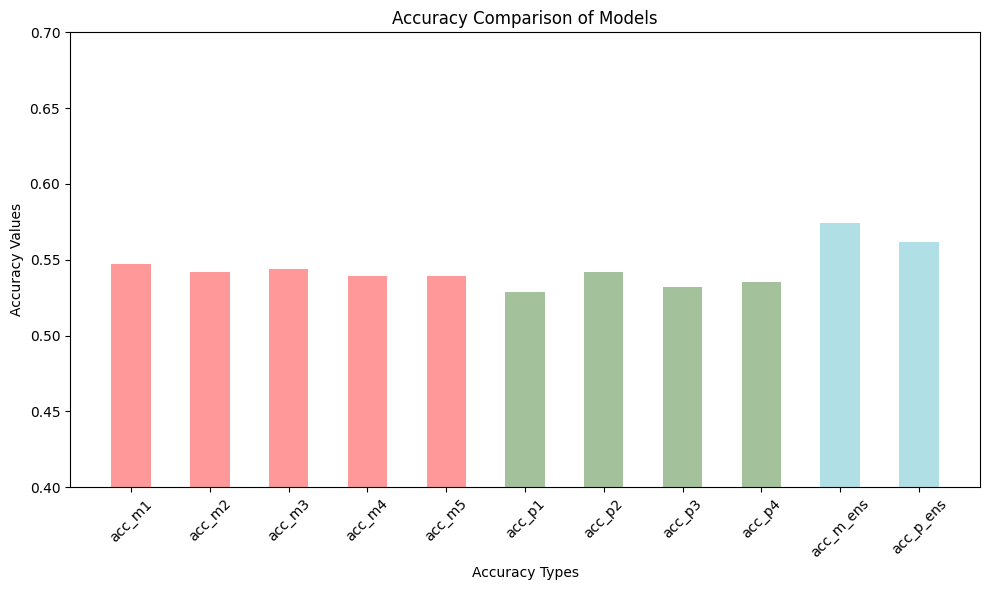

In [103]:

accuracies = {
    "acc_m1": accuracy_m1,
    "acc_m2": accuracy_m2,
    "acc_m3": accuracy_m3,
    "acc_m4": accuracy_m4,
    "acc_m5": accuracy_m5,
    "acc_p1": accuracy_p1,
    "acc_p2": accuracy_p2,
    "acc_p3": accuracy_p3,
    "acc_p4": accuracy_p4,
    "acc_m_ens": accuracy_m_ens,
    "acc_p_ens": accuracy_p_ens
}

plt.figure(figsize=(10, 6))

# Define colors: first 5 bars (soft blue), last 4 bars (soft green)
colors = ['#FF9999'] * 5 + ['#A3C29B'] * 4 + ['#B0E0E6'] * 2

plt.bar(accuracies.keys(), accuracies.values(), color=colors, width=0.5)
plt.xlabel("Accuracy Types")
plt.ylabel("Accuracy Values")
plt.title("Accuracy Comparison of Models")
plt.ylim(0.4, 0.70)  # Focus on the accuracy range for sensitivity
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
